<a href="https://colab.research.google.com/github/KondoKoyo/EU_M_Math/blob/main/Chap09_Ex_01%2C02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

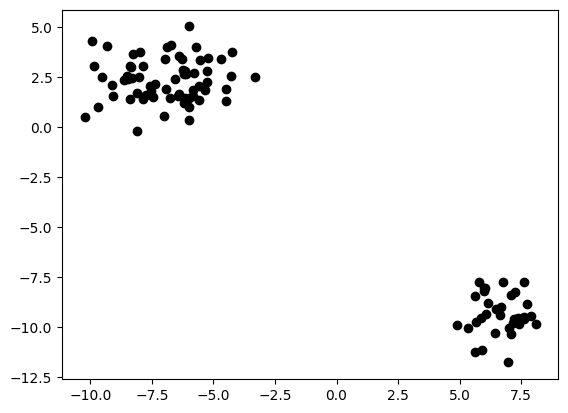

In [7]:
# 9-1
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=52)
plt.scatter(X[:,0],X[:,1],color = 'black')


In [3]:
#9-2

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(iris.data.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))


主成分分析前のデータ次元：(150, 4)
主成分分析後のデータ次元：(150, 2)


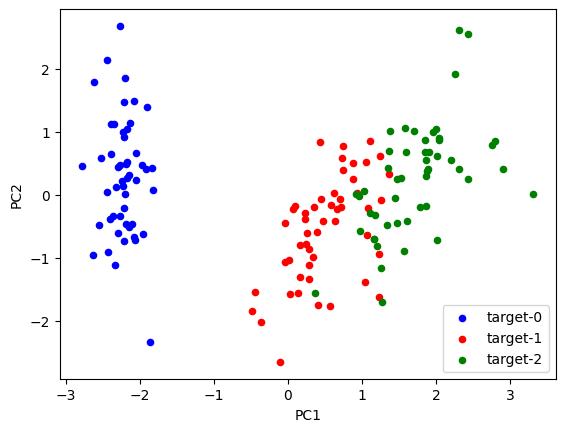

In [5]:
# 9-2
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]),pd.DataFrame(X_pca[:,1]),pd.DataFrame(iris.target)],axis=1) # Use pd.concat instead of pd.conant
merge_data.columns = ['PC1','PC2','target']

ax = None
colors = ['blue','red','green']
for i,data in merge_data.groupby('target'):
    ax = data.plot.scatter(x='PC1',y='PC2',color=colors[i],label=f'target-{i}',ax=ax)

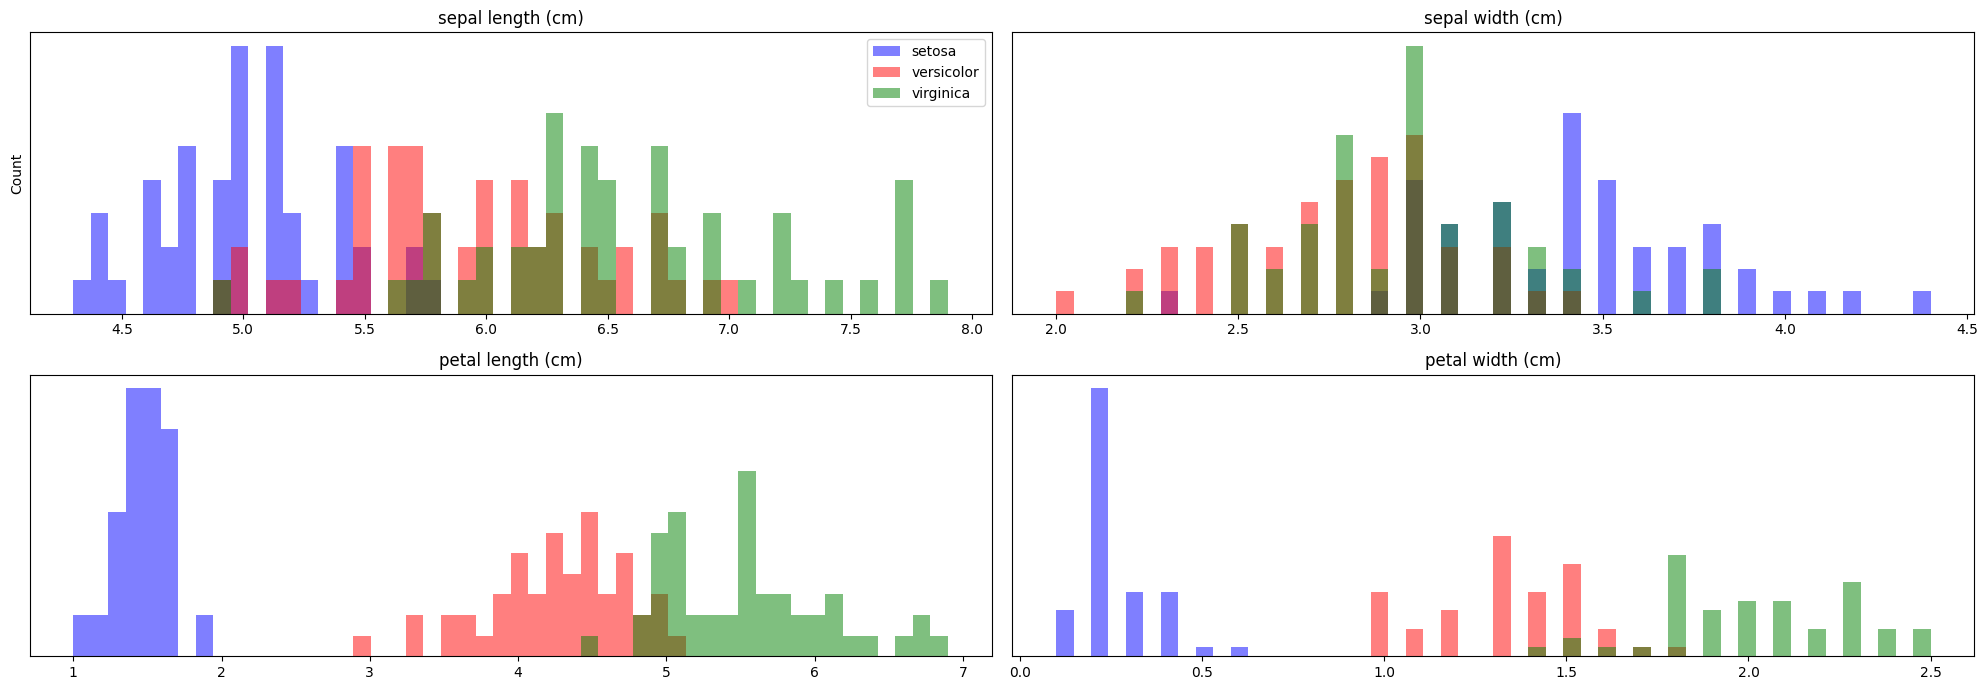

In [6]:
# 9-2
fig,axes = plt.subplots(2,2,figsize=(20,7))

iris_0 = iris.data[iris.target==0]
iris_1 = iris.data[iris.target==1]
iris_2 = iris.data[iris.target==2]

ax = axes.ravel()
for i in range(4):
  _,bins = np.histogram(iris.data[:,i],bins=50)
  ax[i].hist(iris_0[:,i],bins=bins,color='blue',alpha=.5)
  ax[i].hist(iris_1[:,i],bins=bins,color='red',alpha=.5)
  ax[i].hist(iris_2[:,i],bins=bins,color='green',alpha=.5)
  ax[i].set_title(iris.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_ylabel('Count')
ax[0].legend(['setosa','versicolor','virginica'],loc='best')
plt.tight_layout()
